In [193]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [77]:
result_choc = load_model("keras_trial_model_vgg_chocolate.h5")

In [73]:
model_test.summary()

Model: "functional_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_39  (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 257       
Total params: 20,155,969
Trainable params: 131,585
Non-trainable params: 20,024,384
___________________________________

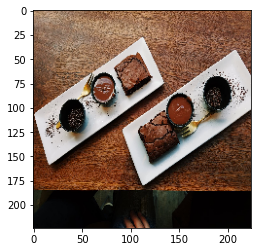

In [220]:
image = load_img('./recipes/chocolate_test.jpg', target_size=(224,224))
# convert image to array
image_input = img_to_array(image)
# show image
plt.imshow(image_input/255.)
plt.show()

In [24]:
def make_prediction(image_path:str, model):
    # load image and resize to fixed size
    image = load_img(image_path, target_size=(224,224))
    # convert image to array
    image_input = img_to_array(image)
    # show image
    plt.imshow(image_input/255.)
    plt.show()
    # expand dimension to make prediction
    image_input = np.expand_dims(image_input, axis=0)
    # make prediction
    pred = model.predict(image_input)
    print(pred)
#    if np.squeeze(pred) > 0.5:
#        print("#healthy")
#    else:
#        print('#healthy does not fit for this pic')

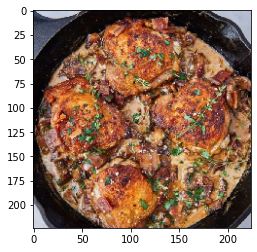

[array([[0.11336592]], dtype=float32), array([[0.12731576]], dtype=float32), array([[0.14430103]], dtype=float32)]


In [25]:
make_prediction('./recipes/CMNtMLPJO7e.png', model_test)

# VGG - single output - no dropout

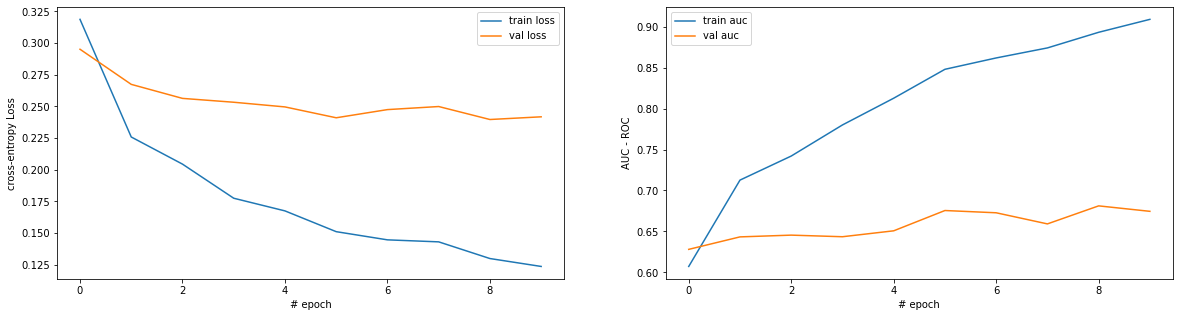

In [104]:
# read file
with open('result_choc_nodropout.json') as myfile:
    result=json.load(myfile)

# construct figure and subplots
fig,ax= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax[1].plot(result["auc"], label="train auc")
ax[1].plot(result["val_auc"], label="val auc")
ax[1].set_ylabel('AUC - ROC')
ax[1].set_xlabel('# epoch')
ax[1].legend()

ax[0].plot(result["loss"], label='train loss')
ax[0].plot(result["val_loss"], label="val loss")
ax[0].set_ylabel('cross-entropy Loss')
ax[0].set_xlabel('# epoch')
ax[0].legend()


# save figure
plt.savefig('./images/choc_nodropout.png')

# single output

### VGG19

In [100]:
# read file
with open('result_vgg_dropout40.json') as myfile:
    result_40_1=json.load(myfile)

In [102]:
# read file
with open('result_vgg_dropout40_round2.json') as myfile:
    result_40_1_round2=json.load(myfile)

In [118]:
# read file
with open('result_vgg_dropout50_round1.json') as myfile:
    result_50_1_round1=json.load(myfile)

In [119]:
result_50_1_round1

{'loss': [0.2175597995519638, 0.17512565851211548, 0.17727653682231903],
 'auc': [0.6899977922439575, 0.7723690867424011, 0.7671377062797546],
 'true_positives': [8.0, 27.0, 23.0],
 'val_loss': [0.18427331745624542, 0.18395884335041046, 0.18974511325359344],
 'val_auc': [0.6974482536315918, 0.7192965149879456, 0.7142845392227173],
 'val_true_positives': [1.0, 0.0, 1.0]}

In [107]:
train_auc

[0.5765877962112427,
 0.61919105052948,
 0.6570075154304504,
 0.7124170064926147,
 0.7284132242202759,
 0.7591209411621094,
 0.7706970572471619,
 0.7969849109649658,
 0.7959136962890625,
 0.8139779567718506,
 0.8456606864929199,
 0.8373703956604004,
 0.8531874418258667,
 0.8592736721038818,
 0.8720651268959045]

In [121]:
train_auc = result_40_1["auc"] + result_40_1_round2["auc_3"] + result_50_1_round1["auc"]
train_loss = result_40_1["loss"] + result_40_1_round2["loss"] + result_50_1_round1["loss"]
val_auc = result_40_1["val_auc"] + result_40_1_round2["val_auc_3"] + result_50_1_round1["val_auc"]
val_loss = result_40_1["val_loss"] + result_40_1_round2["val_loss"] + result_50_1_round1["val_loss"]

### ResNet50 - no dropout

In [180]:
# read file
with open('result_resn50_1label_nodropout.json') as myfile:
    result_resn50_1tag_nodropt=json.load(myfile)

In [194]:
# read file
with open('result_resn50_1label_dropout_r1.json') as myfile: #
    result_resn50_1tag_dropt_r1=json.load(myfile)

In [195]:
# read file
with open('result_resn50_1label_dropout_r2.json') as myfile:
    result_resn50_1tag_dropt_r2=json.load(myfile)

In [197]:
train_auc = result_resn50_1tag_nodropt["auc"] + result_resn50_1tag_dropt_r1["auc"] + result_resn50_1tag_dropt_r2["auc"]
train_loss = result_resn50_1tag_nodropt["loss"] + result_resn50_1tag_dropt_r1["loss"] + result_resn50_1tag_dropt_r2["loss"]
val_auc = result_resn50_1tag_nodropt["val_auc"] + result_resn50_1tag_dropt_r1["val_auc"] + result_resn50_1tag_dropt_r2["val_auc"]
val_loss = result_resn50_1tag_nodropt["val_loss"] + result_resn50_1tag_dropt_r1["val_loss"] + result_resn50_1tag_dropt_r2["val_loss"]

### Create graph

In [199]:
from keras.models import load_model

In [200]:
t = load_model("result_resn50_1label_dropout_r2.h5")
t.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_3 (Tenso (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_Sub_3 (TensorFlo (None, 224, 224, 3)       0         
_________________________________________________________________
dropout_0.4_1 (Dropout)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_0.2_2 (Dropout)      (None, 2048)             

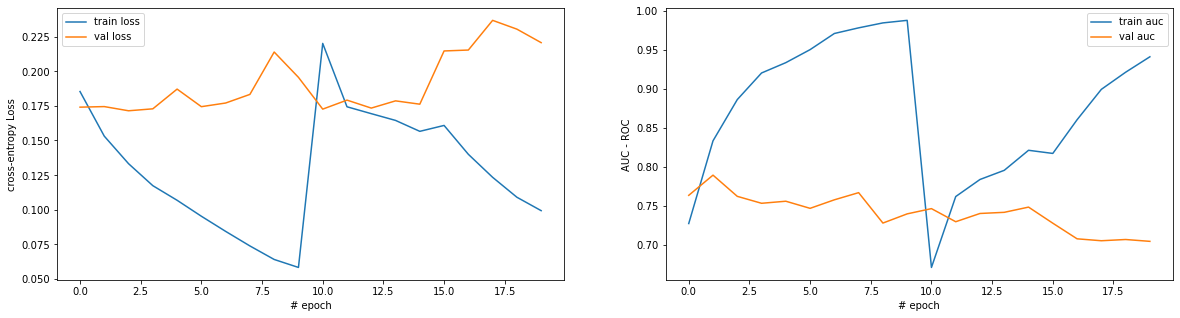

In [198]:
# construct figure and subplots
fig,ax= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax[1].plot(train_auc, label="train auc")
ax[1].plot(val_auc, label="val auc")
ax[1].set_ylabel('AUC - ROC')
ax[1].set_xlabel('# epoch')
ax[1].legend()

ax[0].plot(train_loss, label='train loss')
ax[0].plot(val_loss, label="val loss")
ax[0].set_ylabel('cross-entropy Loss')
ax[0].set_xlabel('# epoch')
ax[0].legend()


# save figure
plt.savefig('./images/evaluation_resn50_1tag_nodropout-dropr1-dropr2.png')

## Confusion matrix on test set

# ResNet 50 - 3 labels

In [221]:
# read file
with open("result_resn_3tag_outpt_dropt_r1.json") as myfile:
    result=json.load(myfile)

In [222]:
result.keys()

dict_keys(['loss', 'Out_0_loss', 'Out_1_loss', 'Out_2_loss', 'Out_0_auc', 'Out_0_true_positives', 'Out_1_auc_1', 'Out_1_true_positives_1', 'Out_2_auc_2', 'Out_2_true_positives_2', 'val_loss', 'val_Out_0_loss', 'val_Out_1_loss', 'val_Out_2_loss', 'val_Out_0_auc', 'val_Out_0_true_positives', 'val_Out_1_auc_1', 'val_Out_1_true_positives_1', 'val_Out_2_auc_2', 'val_Out_2_true_positives_2'])

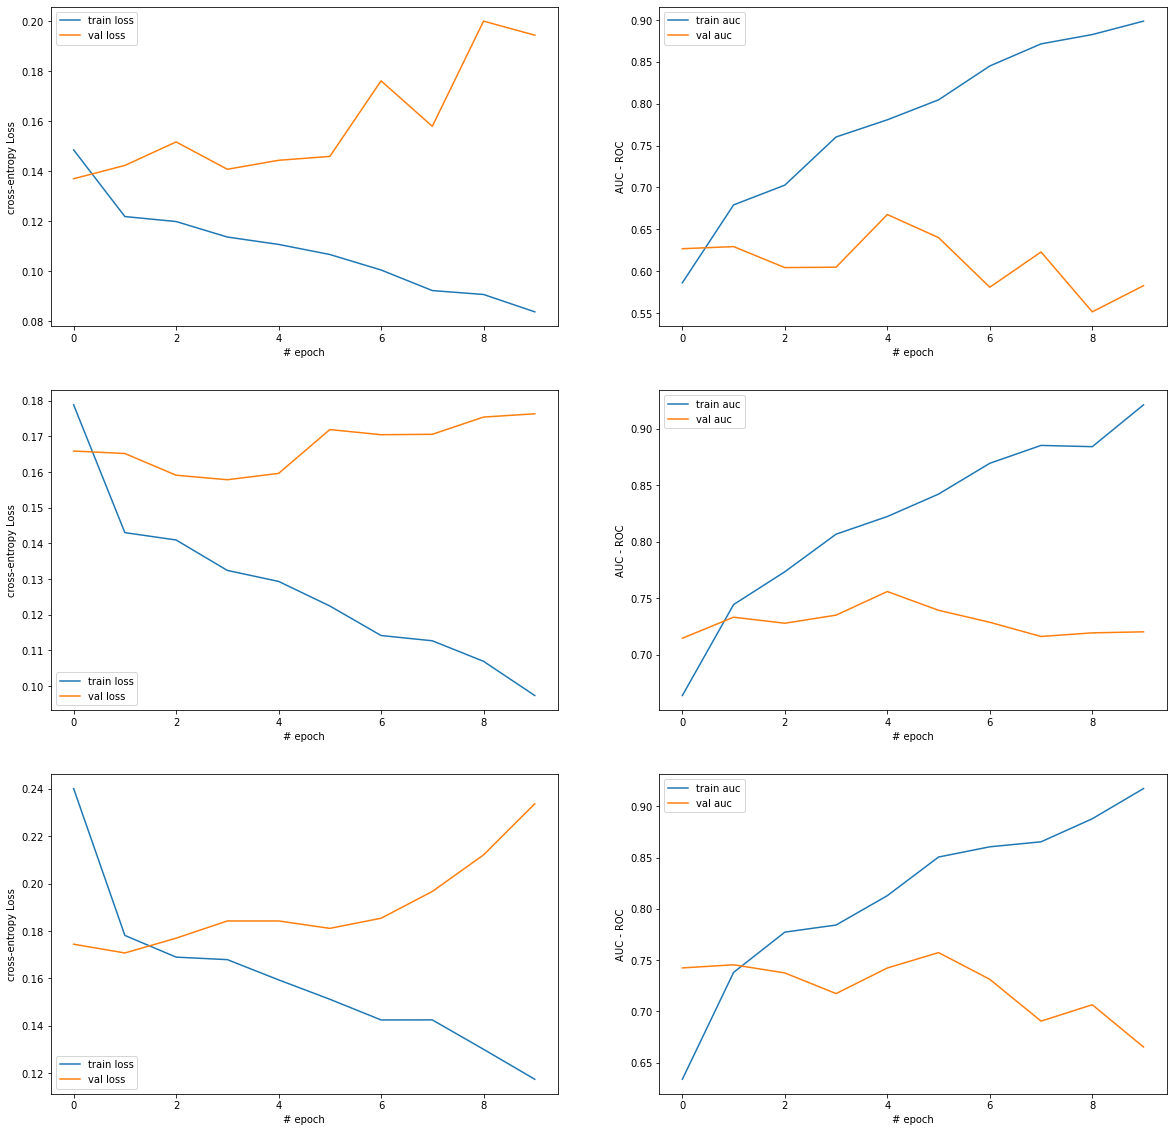

In [226]:
# read file
with open("result_resn_3tag_outpt_dropt_r1.json") as myfile:
    result=json.load(myfile)

# construct figure and subplots
fig,ax= plt.subplots(nrows=3, ncols=2, figsize=(20,20))
# first
ax[0,1].plot(result['Out_0_auc'], label="train auc")
ax[0,1].plot(result["val_Out_0_auc"], label="val auc")
ax[0,1].set_ylabel('AUC - ROC')
ax[0,1].set_xlabel('# epoch')
ax[0,1].legend()

ax[0,0].plot(result['Out_0_loss'], label='train loss')
ax[0,0].plot(result["val_Out_0_loss"], label="val loss")
ax[0,0].set_ylabel('cross-entropy Loss')
ax[0,0].set_xlabel('# epoch')
ax[0,0].legend()

# second
ax[1,1].plot(result['Out_1_auc_1'], label="train auc")
ax[1,1].plot(result["val_Out_1_auc_1"], label="val auc")
ax[1,1].set_ylabel('AUC - ROC')
ax[1,1].set_xlabel('# epoch')
ax[1,1].legend()

ax[1,0].plot(result['Out_1_loss'], label='train loss')
ax[1,0].plot(result["val_Out_1_loss"], label="val loss")
ax[1,0].set_ylabel('cross-entropy Loss')
ax[1,0].set_xlabel('# epoch')
ax[1,0].legend()

# third
ax[2,1].plot(result['Out_2_auc_2'], label="train auc")
ax[2,1].plot(result["val_Out_2_auc_2"], label="val auc")
ax[2,1].set_ylabel('AUC - ROC')
ax[2,1].set_xlabel('# epoch')
ax[2,1].legend()

ax[2,0].plot(result['Out_2_loss'], label='train loss')
ax[2,0].plot(result["val_Out_2_loss"], label="val loss")
ax[2,0].set_ylabel('cross-entropy Loss')
ax[2,0].set_xlabel('# epoch')
ax[2,0].legend()


# save figure
plt.savefig('./images/resn_multi_result_dropout.png')

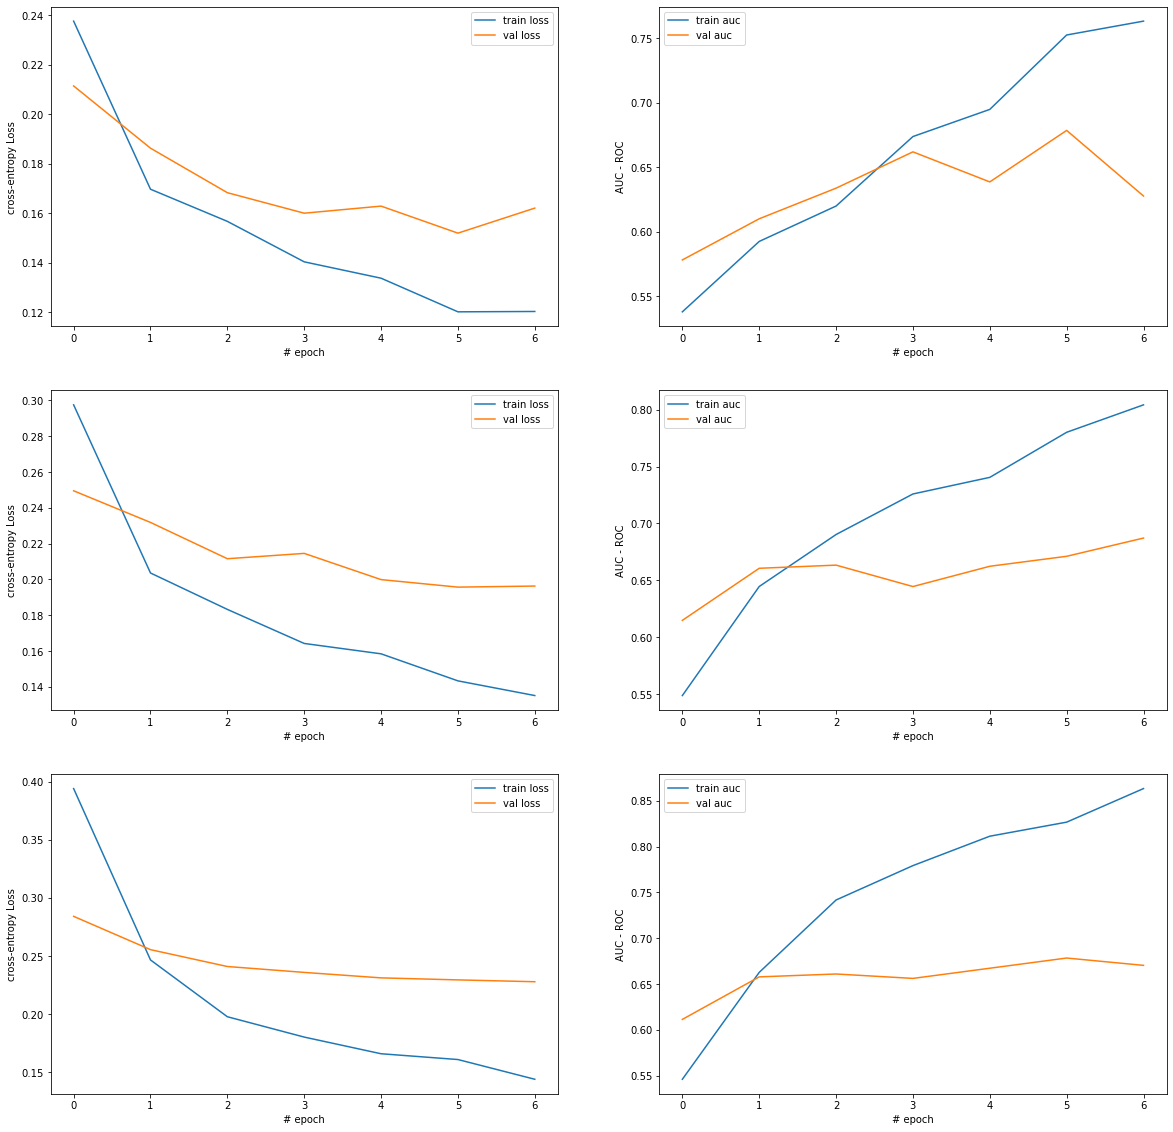

In [116]:
# read file
with open("result_vgg_3labels_nodropout.json") as myfile:
    result=json.load(myfile)

# construct figure and subplots
fig,ax= plt.subplots(nrows=3, ncols=2, figsize=(20,20))
# first
ax[0,1].plot(result["dense_94_auc"], label="train auc")
ax[0,1].plot(result["val_dense_94_auc"], label="val auc")
ax[0,1].set_ylabel('AUC - ROC')
ax[0,1].set_xlabel('# epoch')
ax[0,1].legend()

ax[0,0].plot(result["dense_94_loss"], label='train loss')
ax[0,0].plot(result["val_dense_94_loss"], label="val loss")
ax[0,0].set_ylabel('cross-entropy Loss')
ax[0,0].set_xlabel('# epoch')
ax[0,0].legend()

# second
ax[1,1].plot(result["dense_95_auc_1"], label="train auc")
ax[1,1].plot(result["val_dense_95_auc_1"], label="val auc")
ax[1,1].set_ylabel('AUC - ROC')
ax[1,1].set_xlabel('# epoch')
ax[1,1].legend()

ax[1,0].plot(result["dense_95_loss"], label='train loss')
ax[1,0].plot(result["val_dense_95_loss"], label="val loss")
ax[1,0].set_ylabel('cross-entropy Loss')
ax[1,0].set_xlabel('# epoch')
ax[1,0].legend()

# third
ax[2,1].plot(result["dense_96_auc_2"], label="train auc")
ax[2,1].plot(result["val_dense_96_auc_2"], label="val auc")
ax[2,1].set_ylabel('AUC - ROC')
ax[2,1].set_xlabel('# epoch')
ax[2,1].legend()

ax[2,0].plot(result["dense_96_loss"], label='train loss')
ax[2,0].plot(result["val_dense_96_loss"], label="val loss")
ax[2,0].set_ylabel('cross-entropy Loss')
ax[2,0].set_xlabel('# epoch')
ax[2,0].legend()


# save figure
plt.savefig('./images/vgg_multi_result.png')

# Test set evaluation - single output

In [201]:
single_output_test = pd.read_csv('test_set.csv')

In [227]:
single_output_test

,Unnamed: 0,tag_chicken,tag_pasta,tag_chocolate,photo_id,choc_pred_dropout,choc_pred_nodropout
0,8070,0,0,0,CMSrNO2r1Gd.png,[[0.00329167]],[[0.00029394]]
1,8577,0,0,0,CMb7p6sldgw.png,[[0.00949287]],[[0.01142985]]
2,7973,0,0,0,CMSt_QhnkZu.png,[[0.1214962]],[[0.0514597]]
3,10889,0,0,0,CMs1ndfMXiH.png,[[0.00215143]],[[0.00019807]]
4,1625,0,0,0,CMNntfDHCFy.png,[[0.00057557]],[[0.00077605]]
...,...,...,...,...,...,...,...
1165,11284,0,1,0,CMsc6ZaHpdm.png,[[0.00015852]],[[0.00021344]]
1166,5191,0,0,0,CMRcvlNjjNN.png,[[0.03775477]],[[0.00289699]]
1167,5390,0,0,0,CMQVQIWhvfI.png,[[0.05356371]],[[0.0933764]]
1168,860,0,0,0,CMOUcHDB1tD.png,[[0.00706682]],[[0.009707]]


In [228]:
single_output_test["choc_out"] = single_output_test["choc_pred_nodropout"].fillna(str(np.nan)).apply(lambda x: int(float(x.strip('[]')) >= 0.5))

In [229]:
single_output_test[single_output_test["choc_out"] == 1]

,Unnamed: 0,tag_chicken,tag_pasta,tag_chocolate,photo_id,choc_pred_dropout,choc_pred_nodropout,choc_out
197,7489,0,0,1,CMTF7VGFeUY.png,[[0.17609581]],[[0.79189044]],1
216,9504,0,0,1,CMhYYKYr4D_.png,[[0.22480276]],[[0.8061526]],1
537,9409,0,0,0,CMhcdb8FhcO.png,[[0.4108]],[[0.5337182]],1
695,9662,0,0,1,CMhULvNlTon.png,[[0.18997574]],[[0.6518284]],1
700,559,0,0,0,CMOs46yJLMp.png,[[0.361773]],[[0.79346454]],1
714,8932,0,0,0,CMgqAAgpqSY.png,[[0.05169892]],[[0.677052]],1
735,4,0,0,1,CMPD73jJssJ.png,[[0.5796346]],[[0.50090706]],1
769,8716,0,0,0,CMEZKs3nPUD.png,[[0.39648187]],[[0.88633686]],1
831,7996,0,0,0,CMStWBVjntL.png,[[0.06167775]],[[0.82768834]],1
967,6585,0,0,0,CMT0qTQjJIX.png,[[0.42873907]],[[0.88112205]],1


## confusion matrix

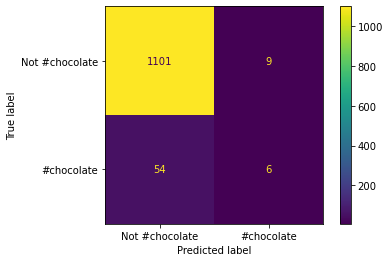

In [237]:
predictions = single_output_test["choc_out"]
cm = confusion_matrix(single_output_test["tag_chocolate"], predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not #chocolate", "#chocolate"])
disp.plot()
plt.savefig('single_label_cm.png')